 # <center>ADS Project </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

Predicting the price of a stock is a commun field for ml. Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones.

**Problem Statement**:
Predicting the price of a stock is a commun field for ml. 
Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. 
For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones. 

**Target Variable**: Ethereum Price

**Models**:
- Autoregressive Integrated Moving Average (ARIMA)
- LSTM
- Holt Winter’s Exponential Smoothing (HWES) 
- FB Prophet

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

Date        Supply  AddressCount  TxGrowth  Difficulty  NetworkHash  \
0 2015-07-30  7.204931e+07        9205.0    8893.0       0.121      11.5297   
1 2015-07-31  7.208550e+07        9361.0       0.0       0.603      51.4594   
2 2015-08-01  7.211320e+07        9476.0       0.0       0.887      57.7845   
3 2015-08-02  7.214143e+07        9563.0       0.0       1.020      67.9224   
4 2015-08-03  7.216940e+07        9639.0       0.0       1.126      74.5737   

   NetworkUtilization  TransactionFee  AvgGasPrice  BlockCountReward  \
0                 0.0             0.0          0.0            6912.0   
1                 0.0             0.0          0.0            6863.0   
2                 0.0             0.0          0.0            5293.0   
3                 0.0             0.0          0.0            5358.0   
4                 0.0             0.0          0.0            5280.0   

   BlockSize  BlockTime  Ethersupply  GasLimit  GasUsed  Uncles  BtcPrice  \
0      644.0       4.46  39316.09375       0.0      0.0  1299.0     287.0   
1      582.0      12.58  36191.71875       0.0      0.0   511.0     283.7   
2      575.0      16.34  27705.93750       0.0      0.0   334.0     280.5   
3      581.0      16.12  28223.43750       0.0      0.0   394.0     281.4   
4      587.0      16.37  27976.71875       0.0      0.0   443.0     281.6   

   Price  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

## 2) Exploratory Data Analysis

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


In [8]:
df_data.describe()

Supply  AddressCount      TxGrowth   Difficulty    NetworkHash  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000    1500.000000   
mean   9.213726e+07  2.152700e+07  3.573513e+05  1381.216629  103992.366783   
std    1.072118e+07  2.498827e+07  3.256708e+05  1298.972394  102427.282277   
min    7.204931e+07  9.205000e+03  0.000000e+00     0.121000      11.529700   
25%    8.278264e+07  5.229082e+05  4.175475e+04    59.658250    4471.975825   
50%    9.407962e+07  5.975766e+06  3.061815e+05  1444.464500   92156.117400   
75%    1.016003e+08  4.406175e+07  6.285058e+05  2505.067250  179726.672575   
max    1.076359e+08  7.469110e+07  1.349890e+06  3606.036000  295911.997400   

       NetworkUtilization  TransactionFee   AvgGasPrice  BlockCountReward  \
count         1500.000000    1.500000e+03  1.500000e+03       1500.000000   
mean             0.468355    3.479465e+20  2.968093e+10       5666.337333   
std              0.372758    4.951416e+20  4.294052e+10        720.416553   
min              0.000000    0.000000e+00  0.000000e+00       2829.000000   
25%              0.056725    3.404057e+19  1.497751e+10       5234.250000   
50%              0.569950    2.910479e+20  2.251696e+10       5946.000000   
75%              0.831900    4.513010e+20  2.688101e+10       6080.000000   
max              0.969000    5.862526e+21  9.395883e+11       6912.000000   

         BlockSize    BlockTime   Ethersupply      GasLimit       GasUsed  \
count   1500.00000  1500.000000   1500.000000  1.500000e+03  1.500000e+03   
mean   11803.14200    15.364400  23750.603146  5.864147e+06  1.993741e+10   
std     9993.41593     2.797517   6437.954850  2.149345e+06  1.830498e+10   
min      575.00000     4.460000  12869.625000  0.000000e+00  0.000000e+00   
25%     1523.00000    13.950000  20230.968750  4.009369e+06  1.351073e+09   
50%    13026.50000    14.340000  21226.718750  6.715085e+06  1.554304e+10   
75%    20983.25000    16.370000  30987.929688  7.997891e+06  3.956602e+10   
max    36630.00000    30.310000  39316.093750  8.004217e+06  4.936428e+10   

            Uncles      BtcPrice        Price  
count  1500.000000   1500.000000  1500.000000  
mean    617.044667   4125.926667   204.687733  
std     370.151816   3947.399550   250.083641  
min     126.000000    211.400000     0.000000  
25%     376.000000    610.250000    10.950000  
50%     462.500000   3418.500000   136.045000  
75%     774.000000   6721.075000   295.085000  
max    2096.000000  19345.500000  1385.020000

In [9]:
# Correlations
df_corr = df_data.corr()
df_corr

Supply  AddressCount  TxGrowth  Difficulty  NetworkHash  \
Supply              1.000000      0.871879  0.843540    0.840346     0.823709   
AddressCount        0.871879      1.000000  0.789259    0.766725     0.782175   
TxGrowth            0.843540      0.789259  1.000000    0.851423     0.875319   
Difficulty          0.840346      0.766725  0.851423    1.000000     0.974904   
NetworkHash         0.823709      0.782175  0.875319    0.974904     1.000000   
NetworkUtilization  0.905329      0.811562  0.936036    0.928816     0.902719   
TransactionFee      0.474226      0.380650  0.647129    0.539480     0.550765   
AvgGasPrice        -0.337491     -0.233489 -0.214922   -0.234873    -0.232651   
BlockCountReward    0.288837      0.362446  0.245369    0.041182     0.214247   
BlockSize           0.870169      0.804732  0.965090    0.915648     0.901368   
BlockTime          -0.187655     -0.288567 -0.197697    0.019681    -0.173559   
Ethersupply        -0.792496     -0.857087 -0.808046   -0.788789    -0.740443   
GasLimit            0.887071      0.813752  0.888451    0.898953     0.885202   
GasUsed             0.902041      0.891032  0.959463    0.904746     0.928528   
Uncles              0.332875      0.243759  0.634506    0.557167     0.654439   
BtcPrice            0.733790      0.651342  0.923400    0.751845     0.782741   
Price               0.511601      0.334379  0.797612    0.680616     0.702010   

                    NetworkUtilization  TransactionFee  AvgGasPrice  \
Supply                        0.905329        0.474226    -0.337491   
AddressCount                  0.811562        0.380650    -0.233489   
TxGrowth                      0.936036        0.647129    -0.214922   
Difficulty                    0.928816        0.539480    -0.234873   
NetworkHash                   0.902719        0.550765    -0.232651   
NetworkUtilization            1.000000        0.627518    -0.236102   
TransactionFee                0.627518        1.000000     0.076165   
AvgGasPrice                  -0.236102        0.076165     1.000000   
BlockCountReward              0.088811        0.034146    -0.193311   
BlockSize                     0.975272        0.634351    -0.220846   
BlockTime                    -0.017440       -0.034050     0.141051   
Ethersupply                  -0.859511       -0.442397     0.152590   
GasLimit                      0.906912        0.542742    -0.283996   
GasUsed                       0.961191        0.603379    -0.238085   
Uncles                        0.535564        0.582100    -0.074185   
BtcPrice                      0.845872        0.645400    -0.179950   
Price                         0.710283        0.659227    -0.109099   

                    BlockCountReward  BlockSize  BlockTime  Ethersupply  \
Supply                      0.288837   0.870169  -0.187655    -0.792496   
AddressCount                0.362446   0.804732  -0.288567    -0.857087   
TxGrowth                    0.245369   0.965090  -0.197697    -0.808046   
Difficulty                  0.041182   0.915648   0.019681    -0.788789   
NetworkHash                 0.214247   0.901368  -0.173559    -0.740443   
NetworkUtilization          0.088811   0.975272  -0.017440    -0.859511   
TransactionFee              0.034146   0.634351  -0.034050    -0.442397   
AvgGasPrice                -0.193311  -0.220846   0.141051     0.152590   
BlockCountReward            1.000000   0.110668  -0.966166     0.038047   
BlockSize                   0.110668   1.000000  -0.046829    -0.854043   
BlockTime                  -0.966166  -0.046829   1.000000    -0.113346   
Ethersupply                 0.038047  -0.854043  -0.113346     1.000000   
GasLimit                    0.174196   0.912690  -0.106722    -0.821515   
GasUsed                     0.292405   0.961338  -0.232798    -0.859432   
Uncles                      0.265952   0.573232  -0.307529    -0.195855   
BtcPrice                    0.238820   0.879677  -0.188967    -0.711066   
Price    

### Data Visualization

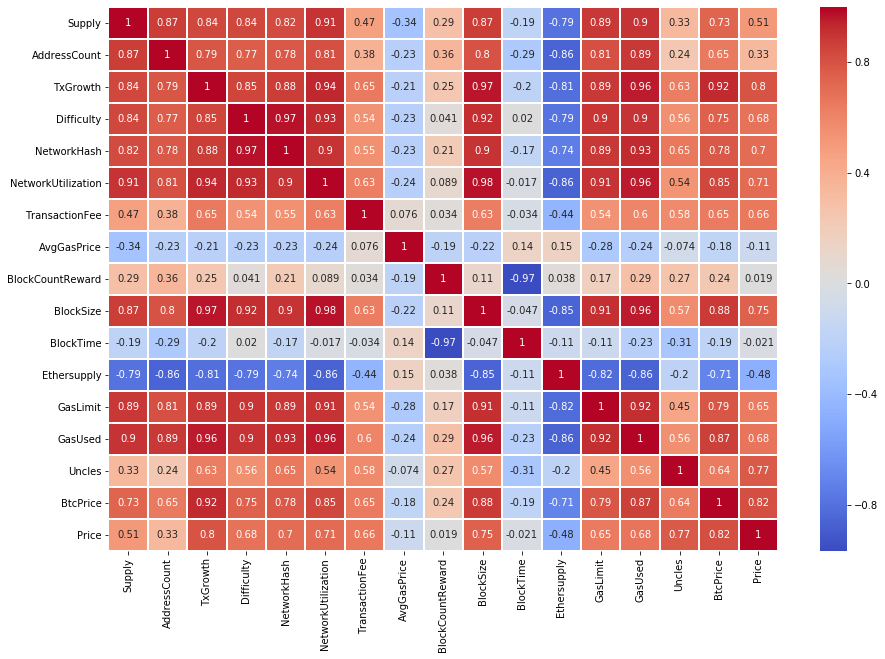

In [10]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

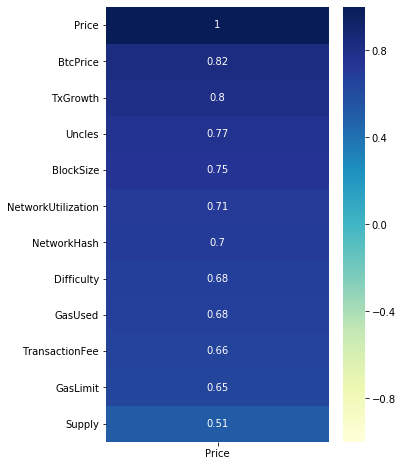

In [11]:
fig1, ax = plt.subplots(figsize=(5,8))
sns.heatmap(df_data.corr()[['Price']].sort_values('Price').tail(12),vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [12]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values, 4)

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


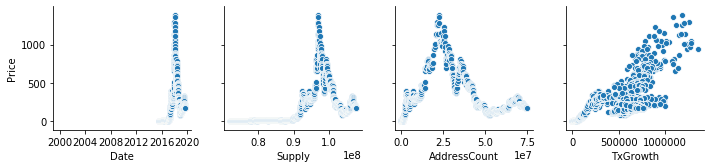

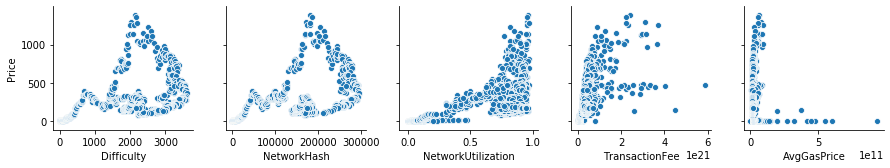

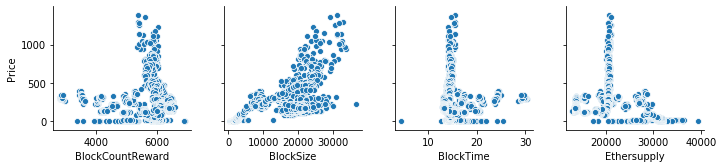

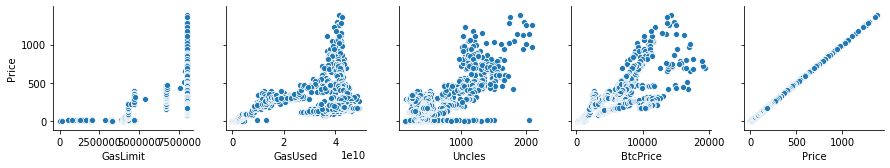

In [13]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

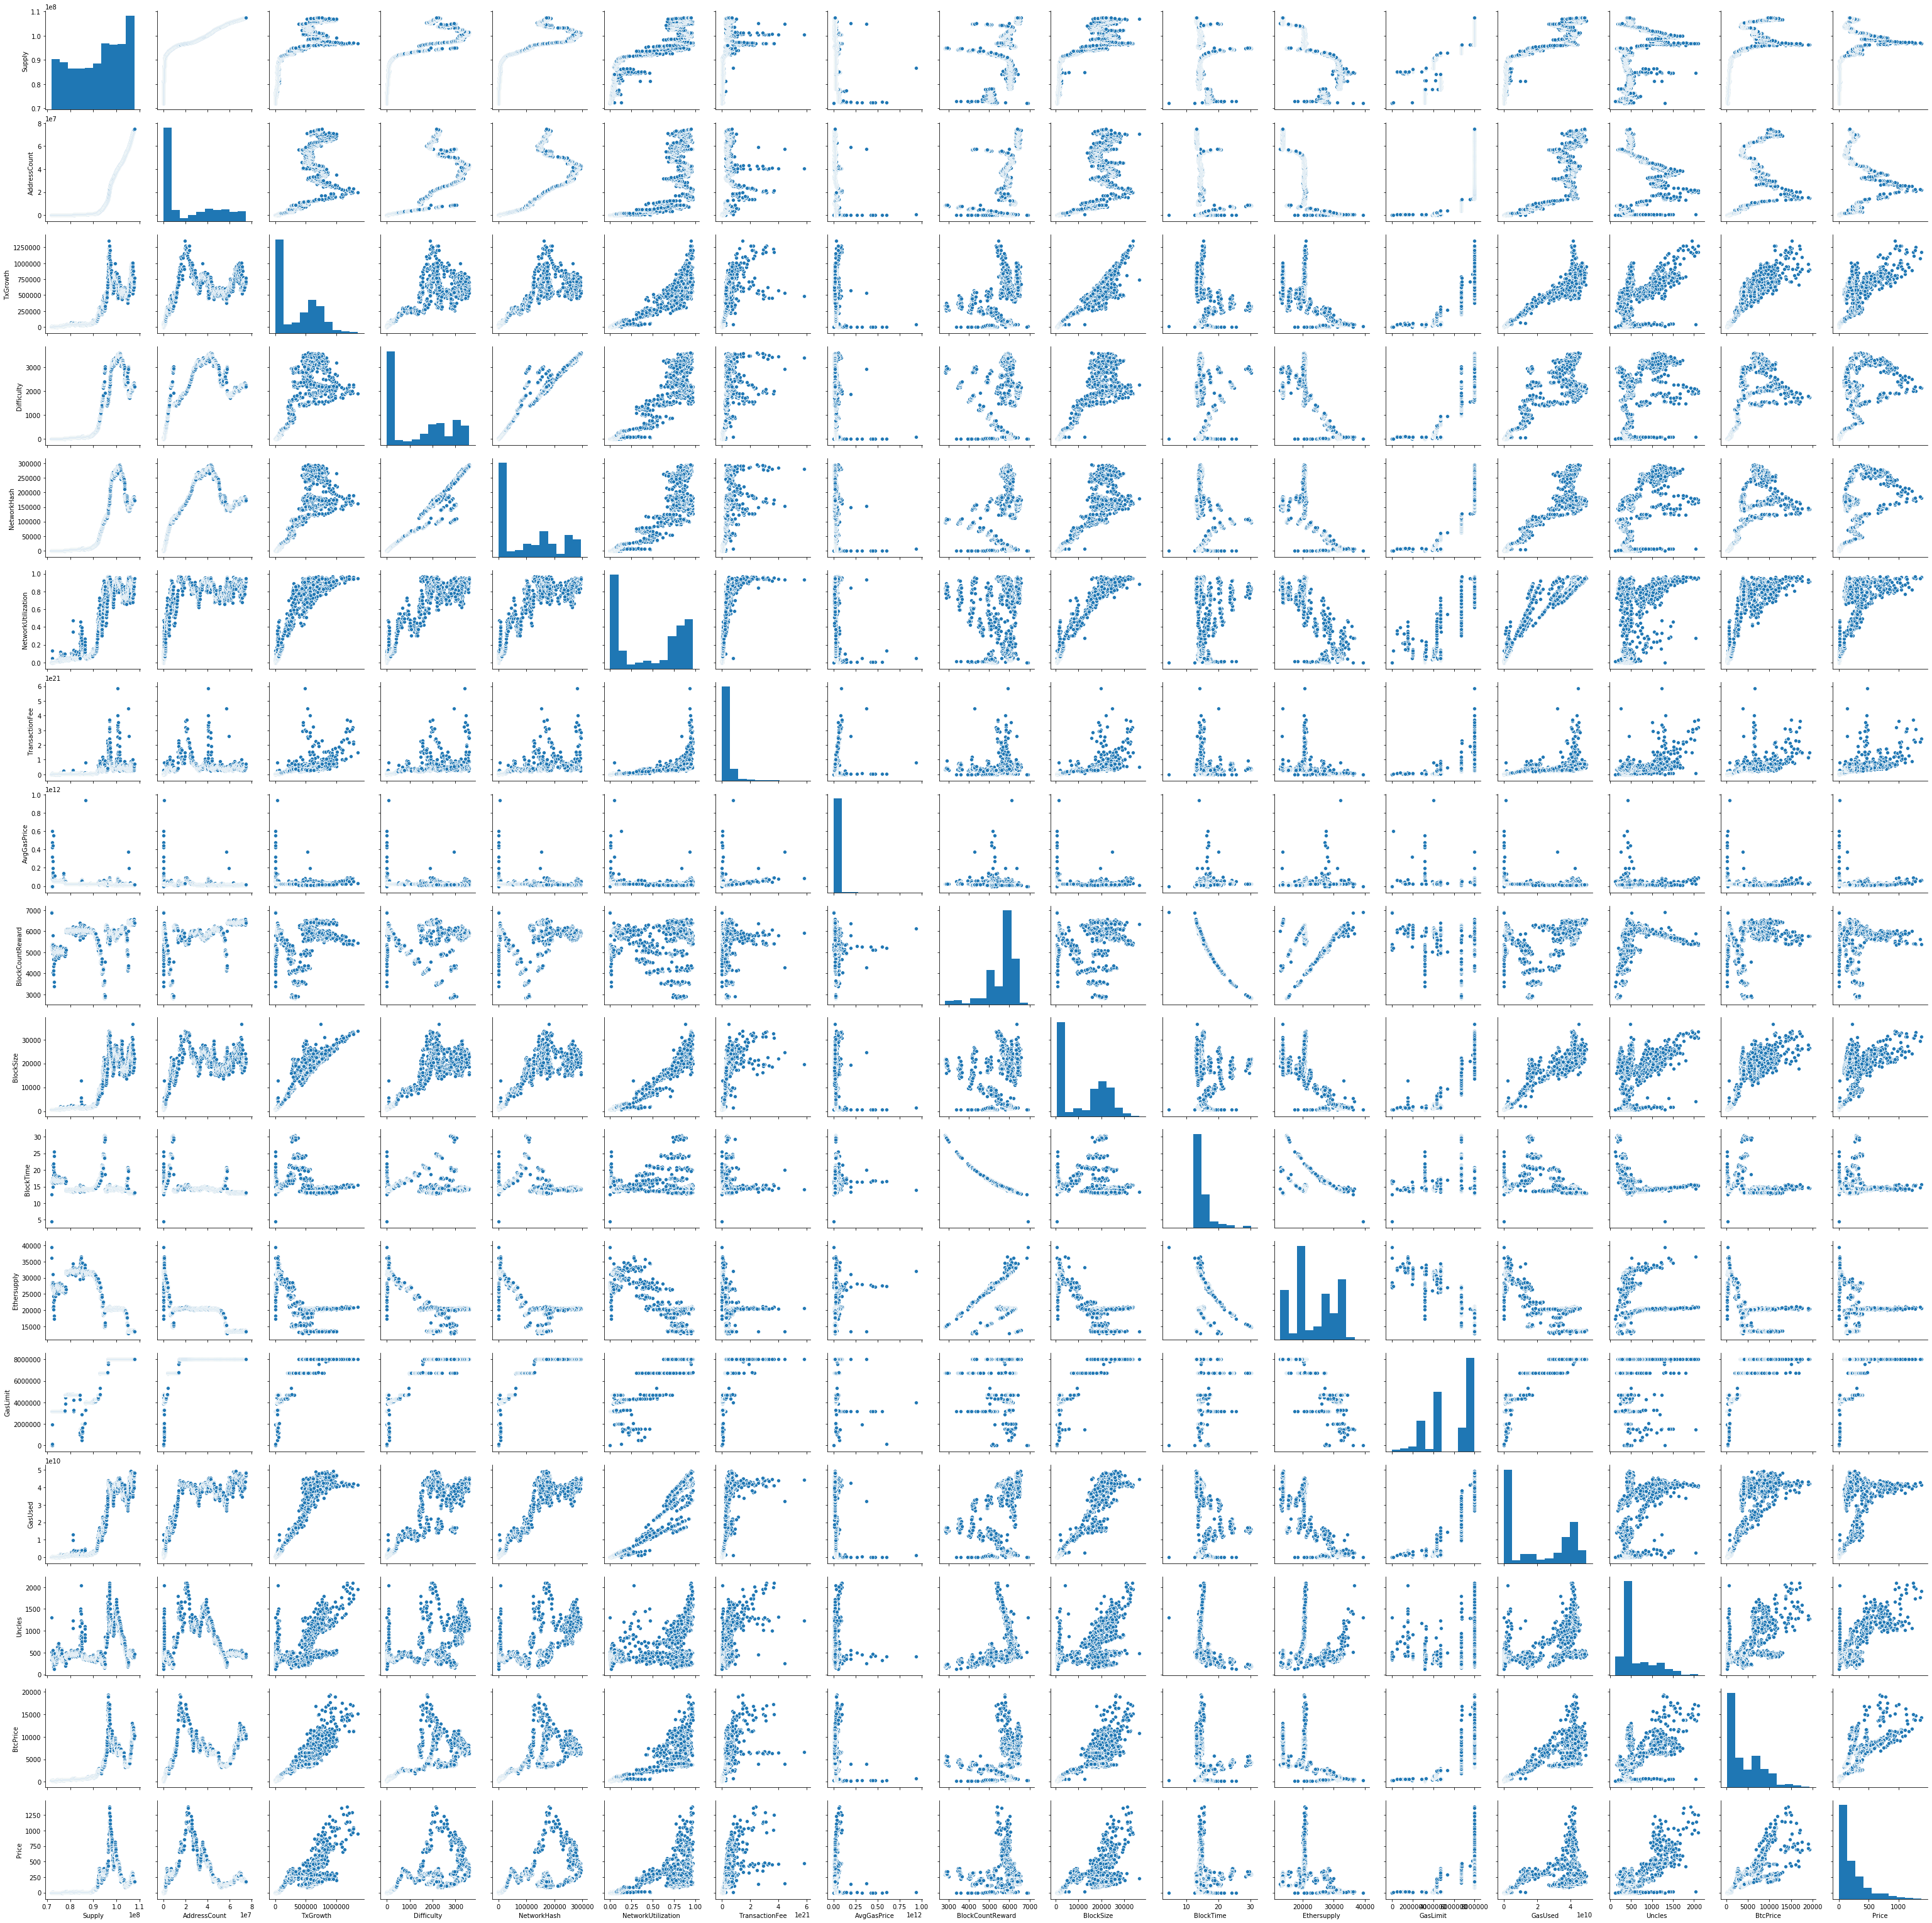

In [14]:
# Visualizations - PairPlot
sns.pairplot(df_data)
plt.show()

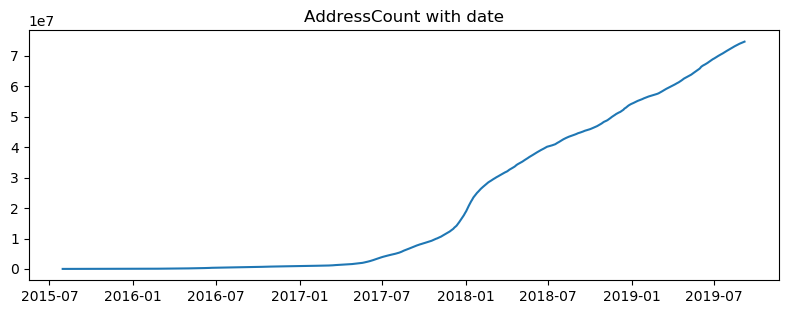

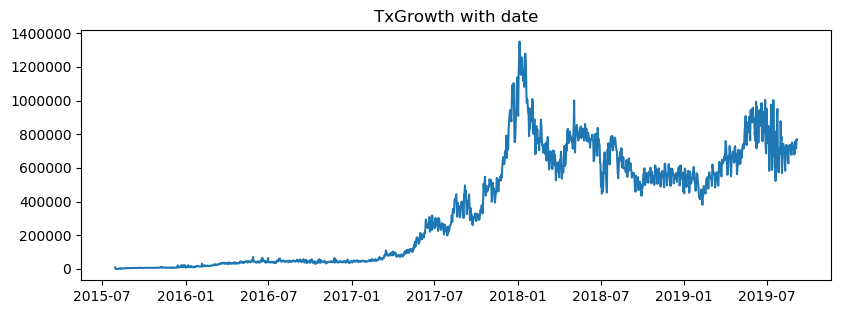

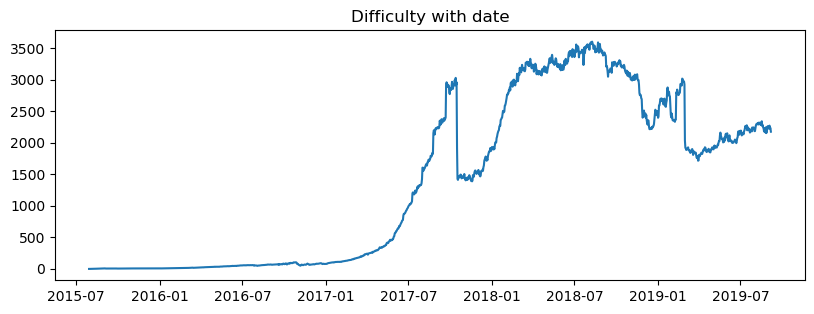

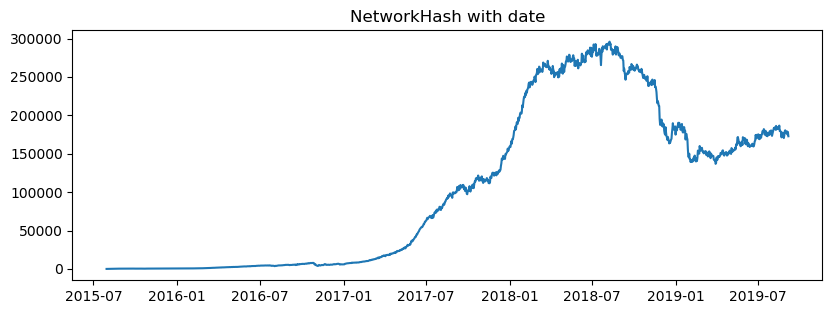

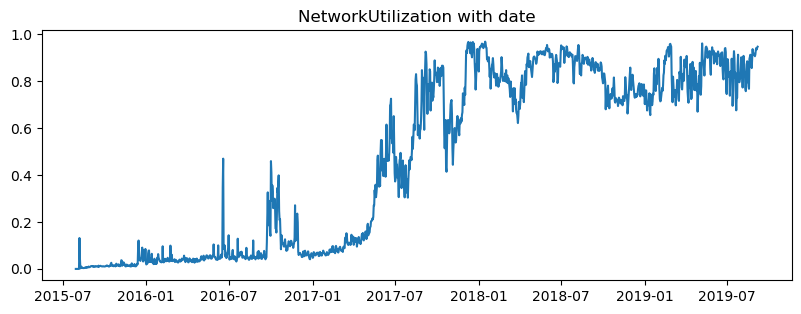

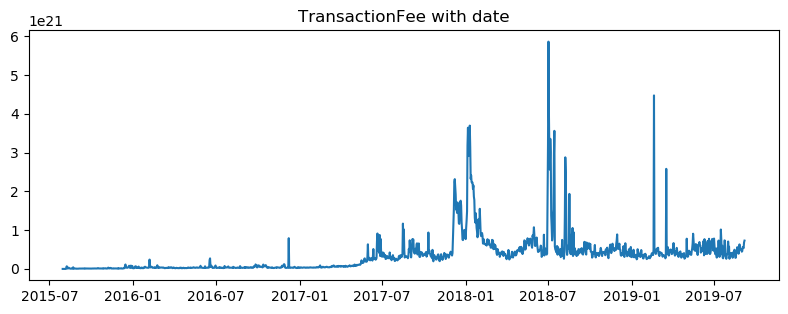

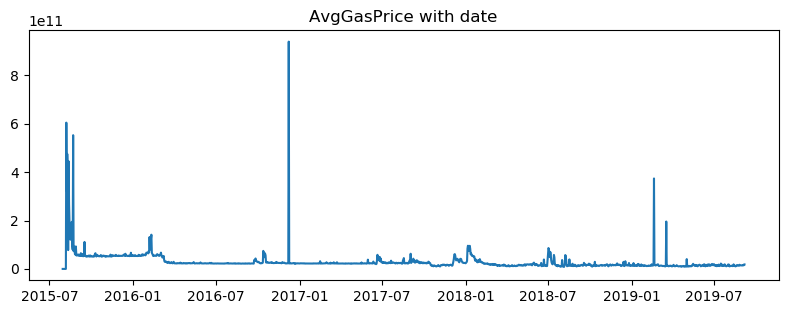

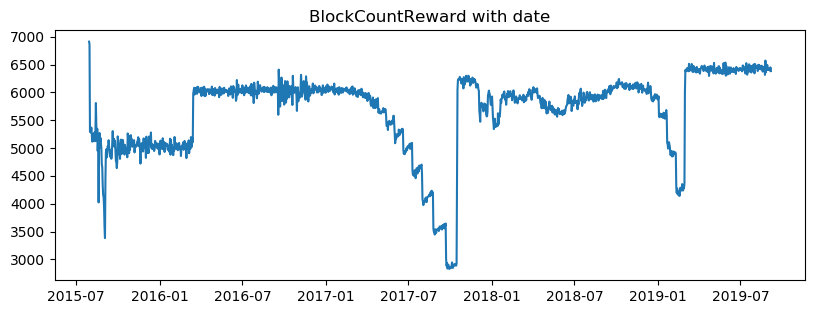

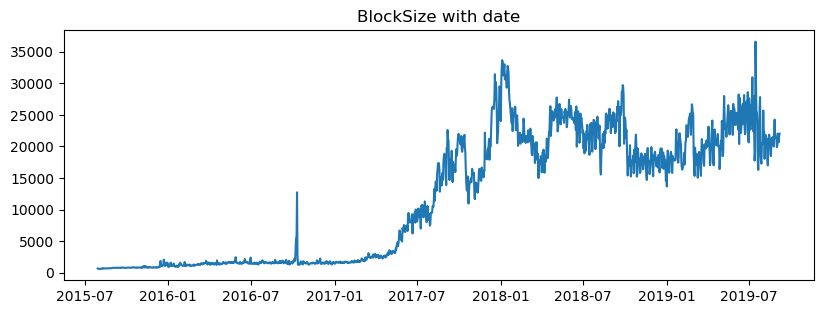

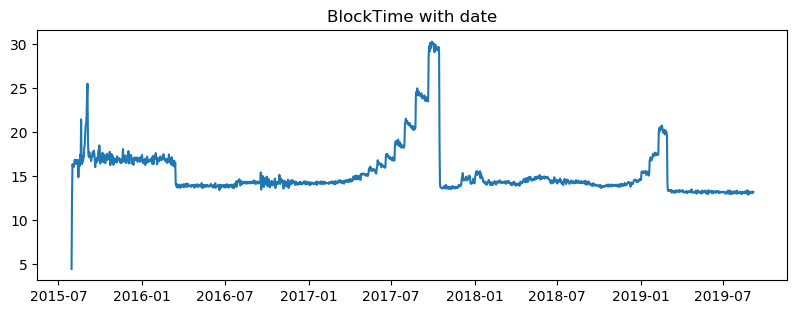

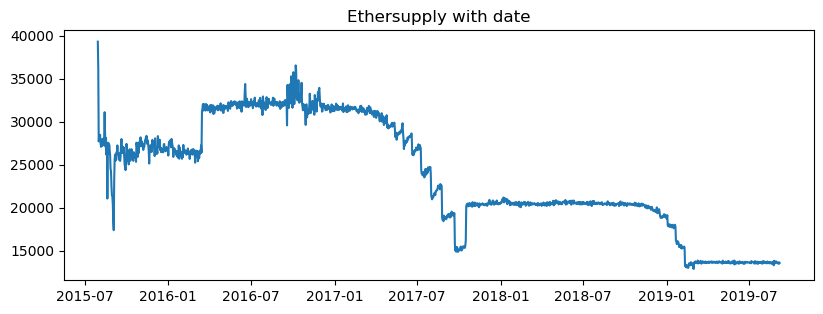

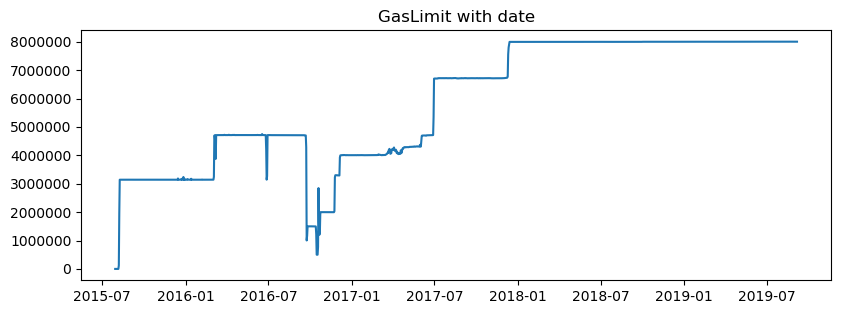

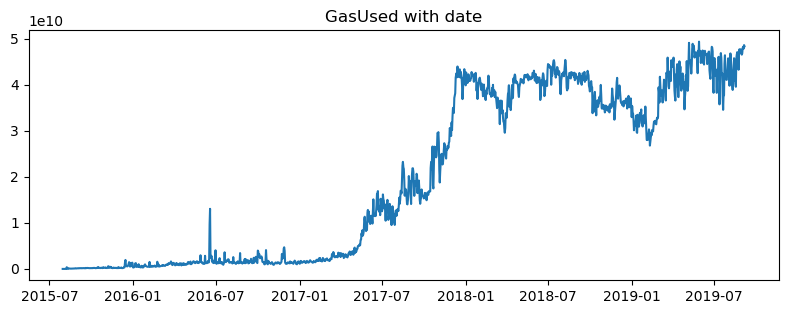

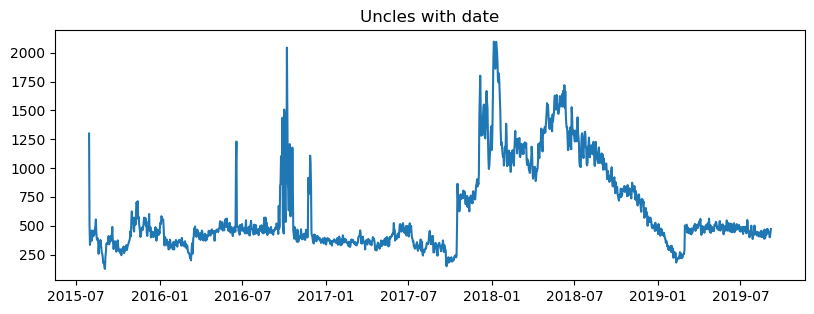

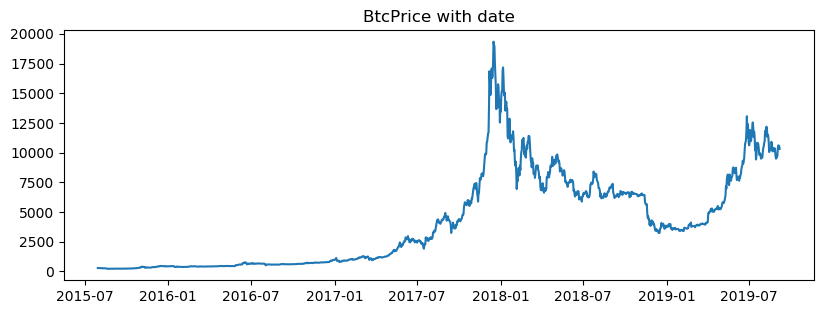

In [15]:
# Visualizations
x = df_data["Date"]

for element in columns[1:]:
    plt.show()
    y = df_data[element]
    fig = plt.figure(figsize = (15,5), dpi=100)
    axes = fig.add_axes([0.5,0.5,0.5,0.5])
    axes.plot(x,y)
    axes.set_title(element+" with date")

plt.show()

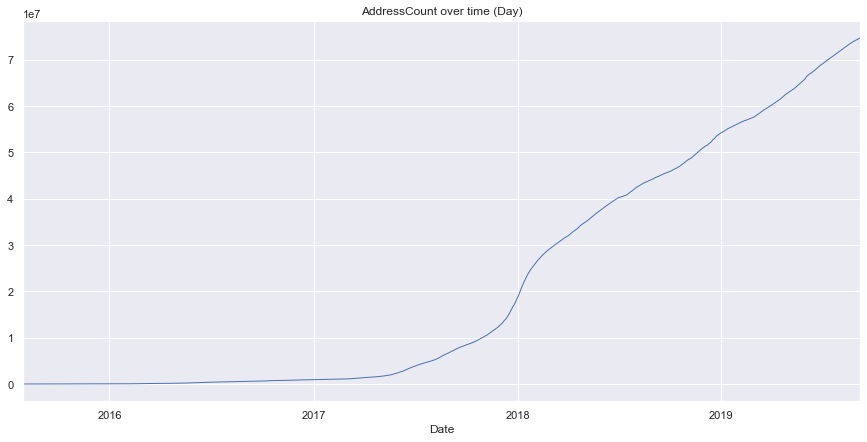

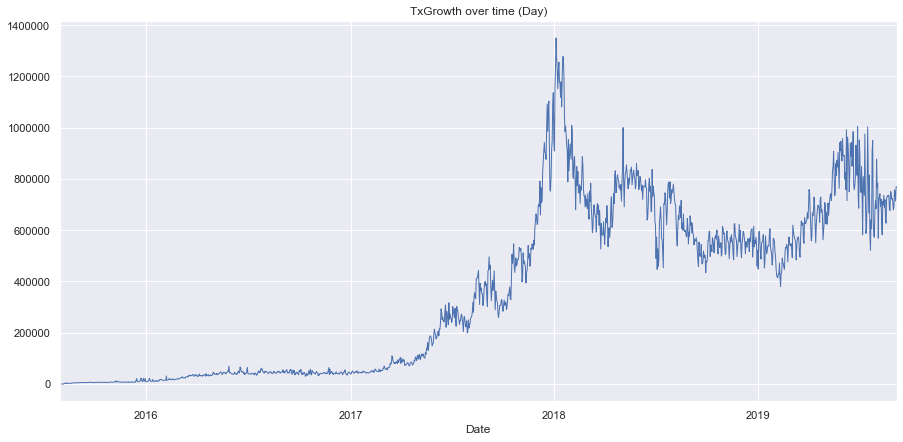

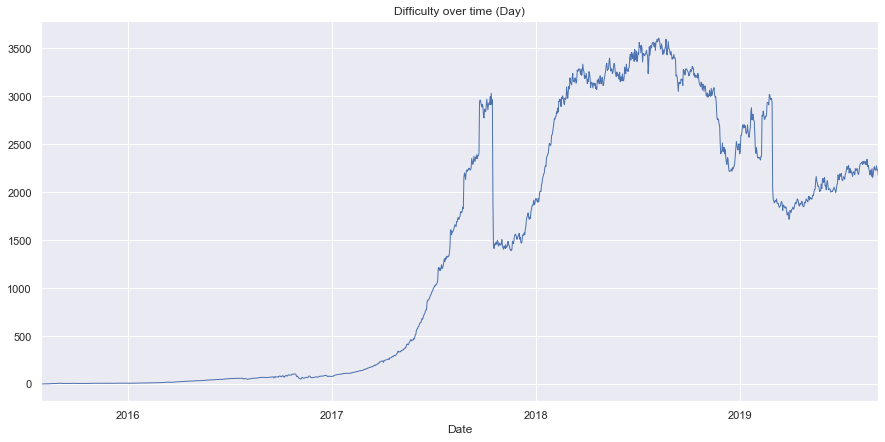

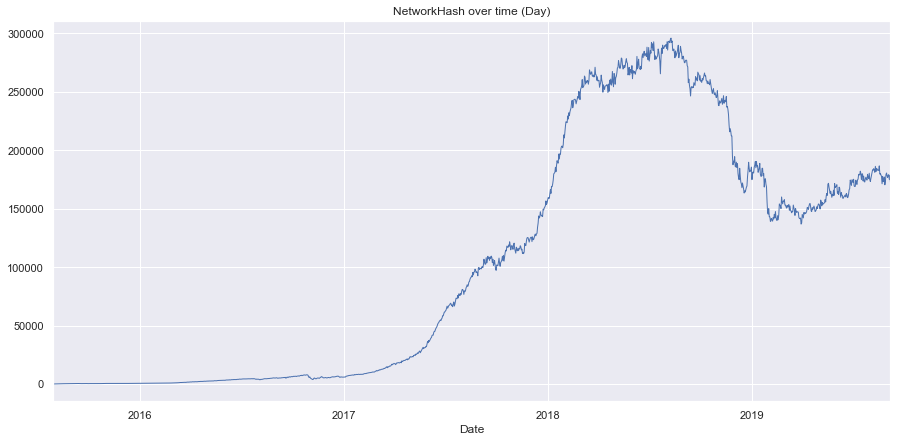

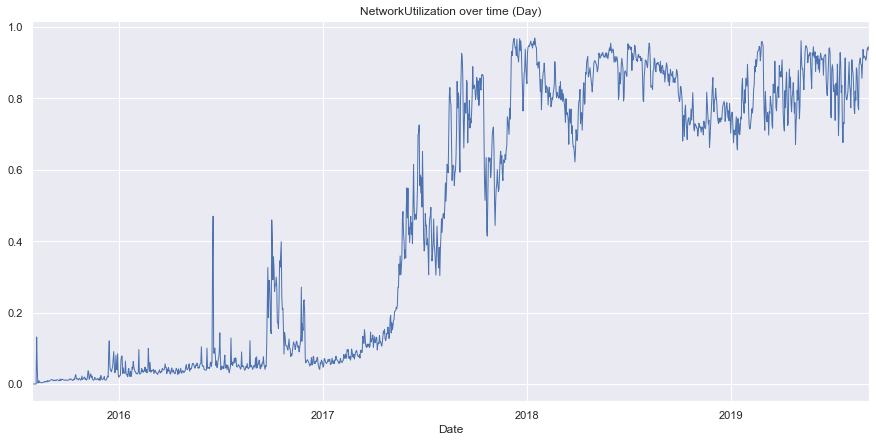

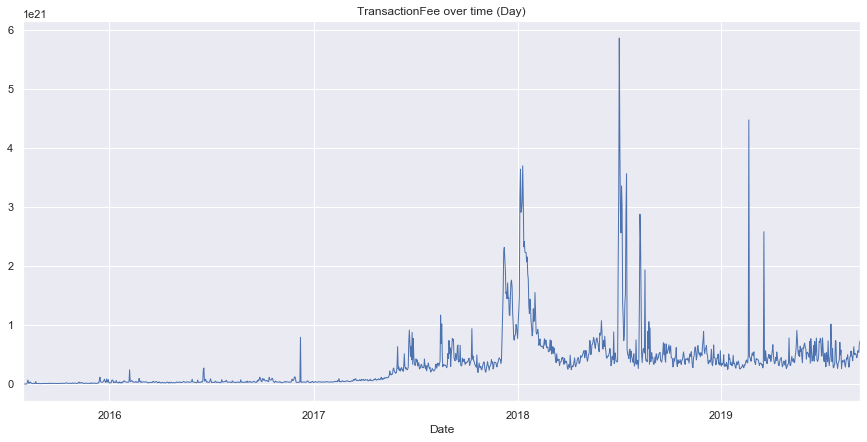

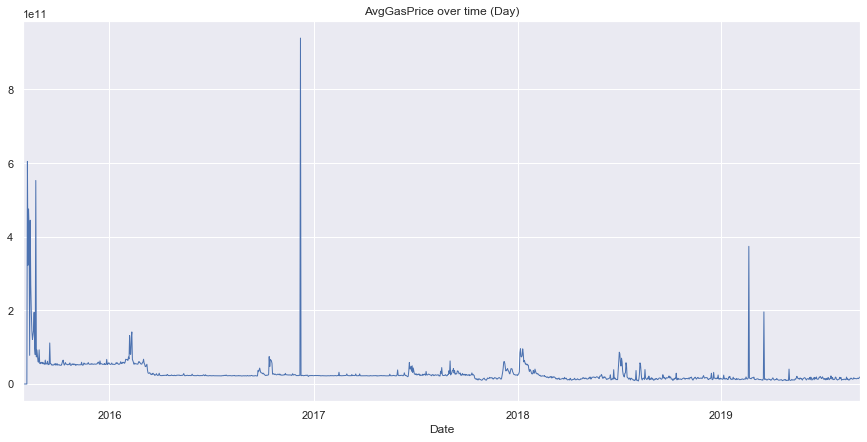

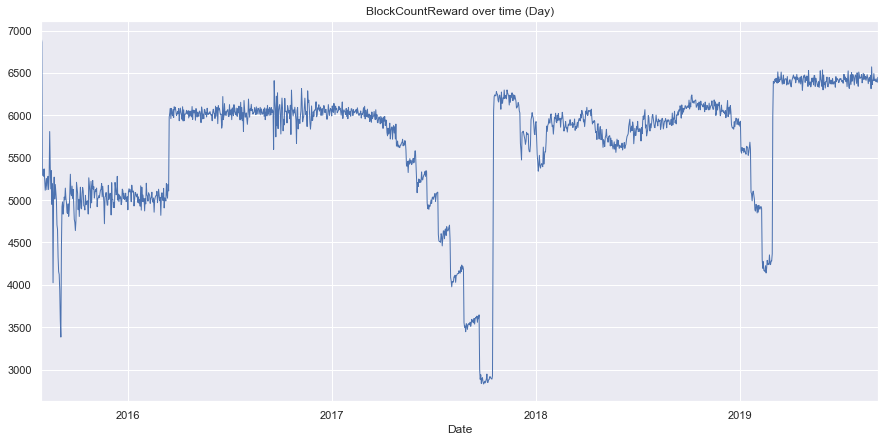

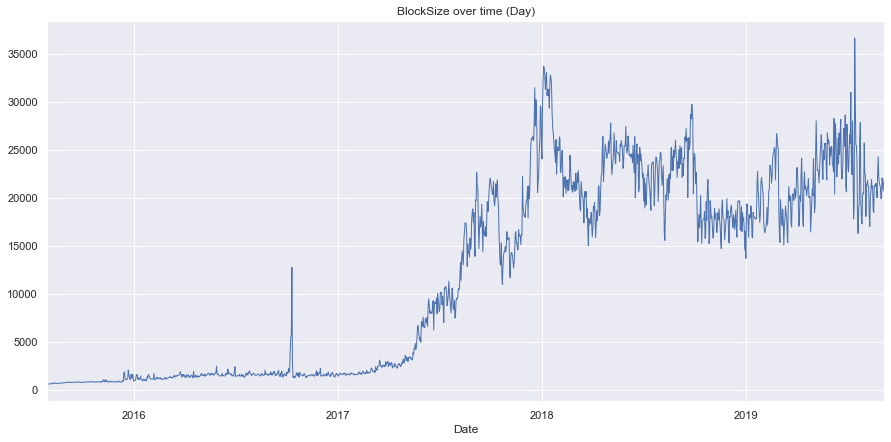

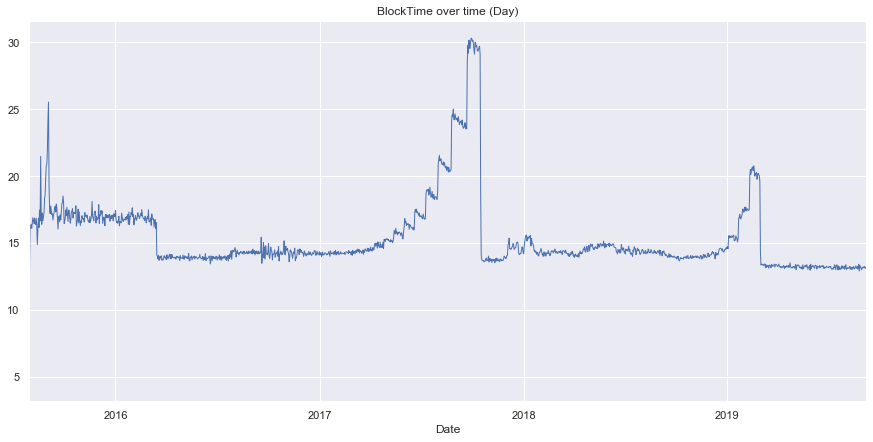

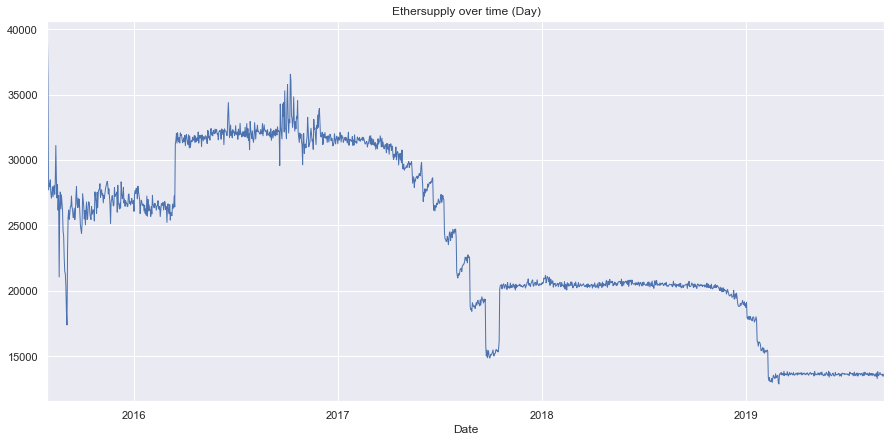

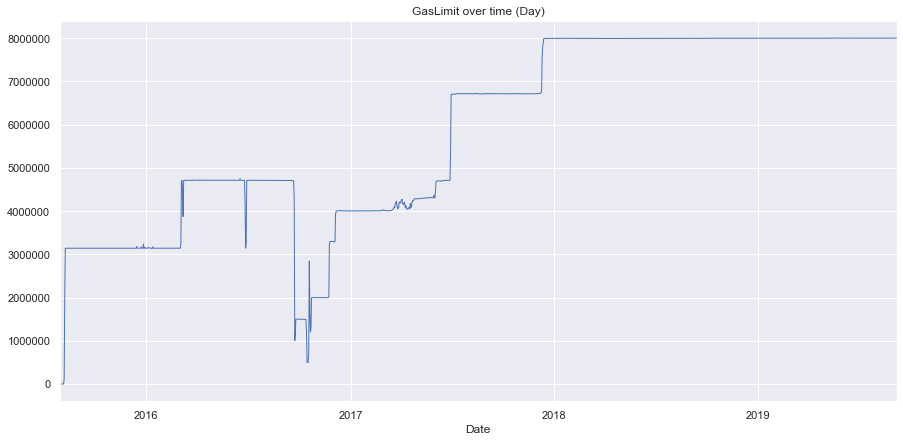

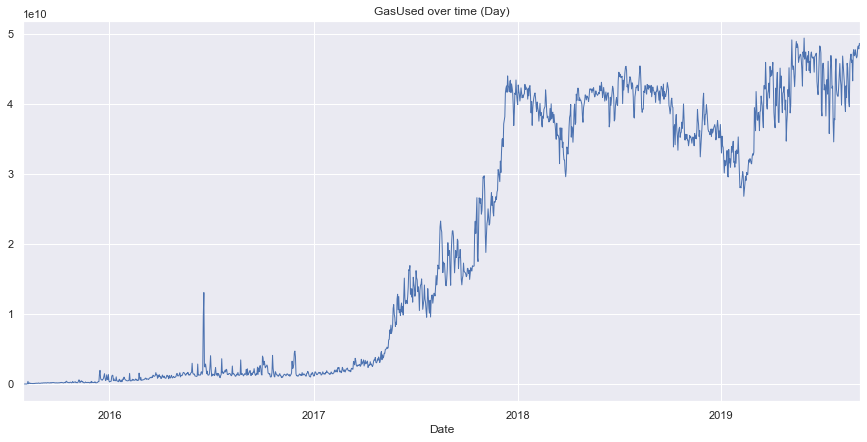

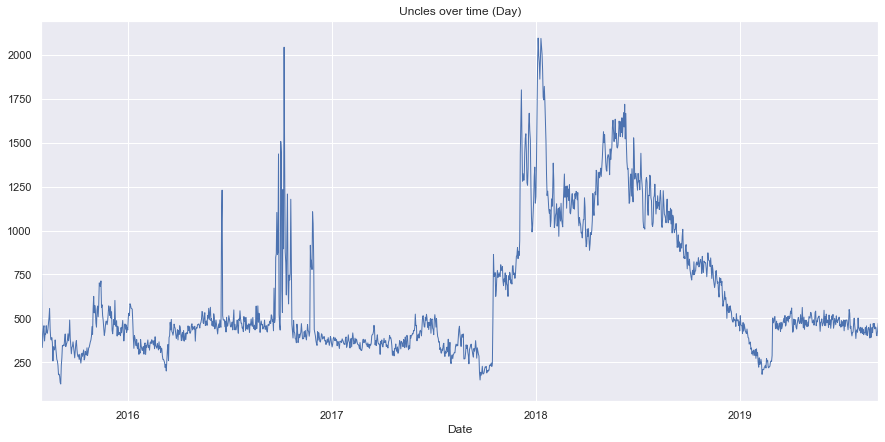

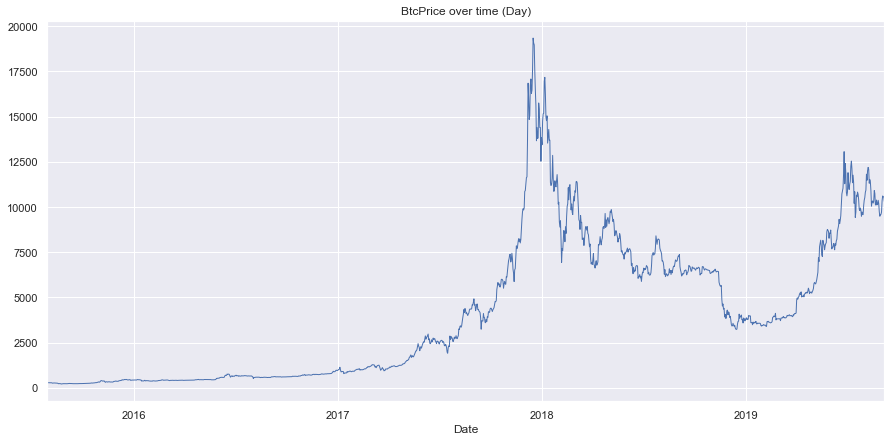

In [16]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(15, 7)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

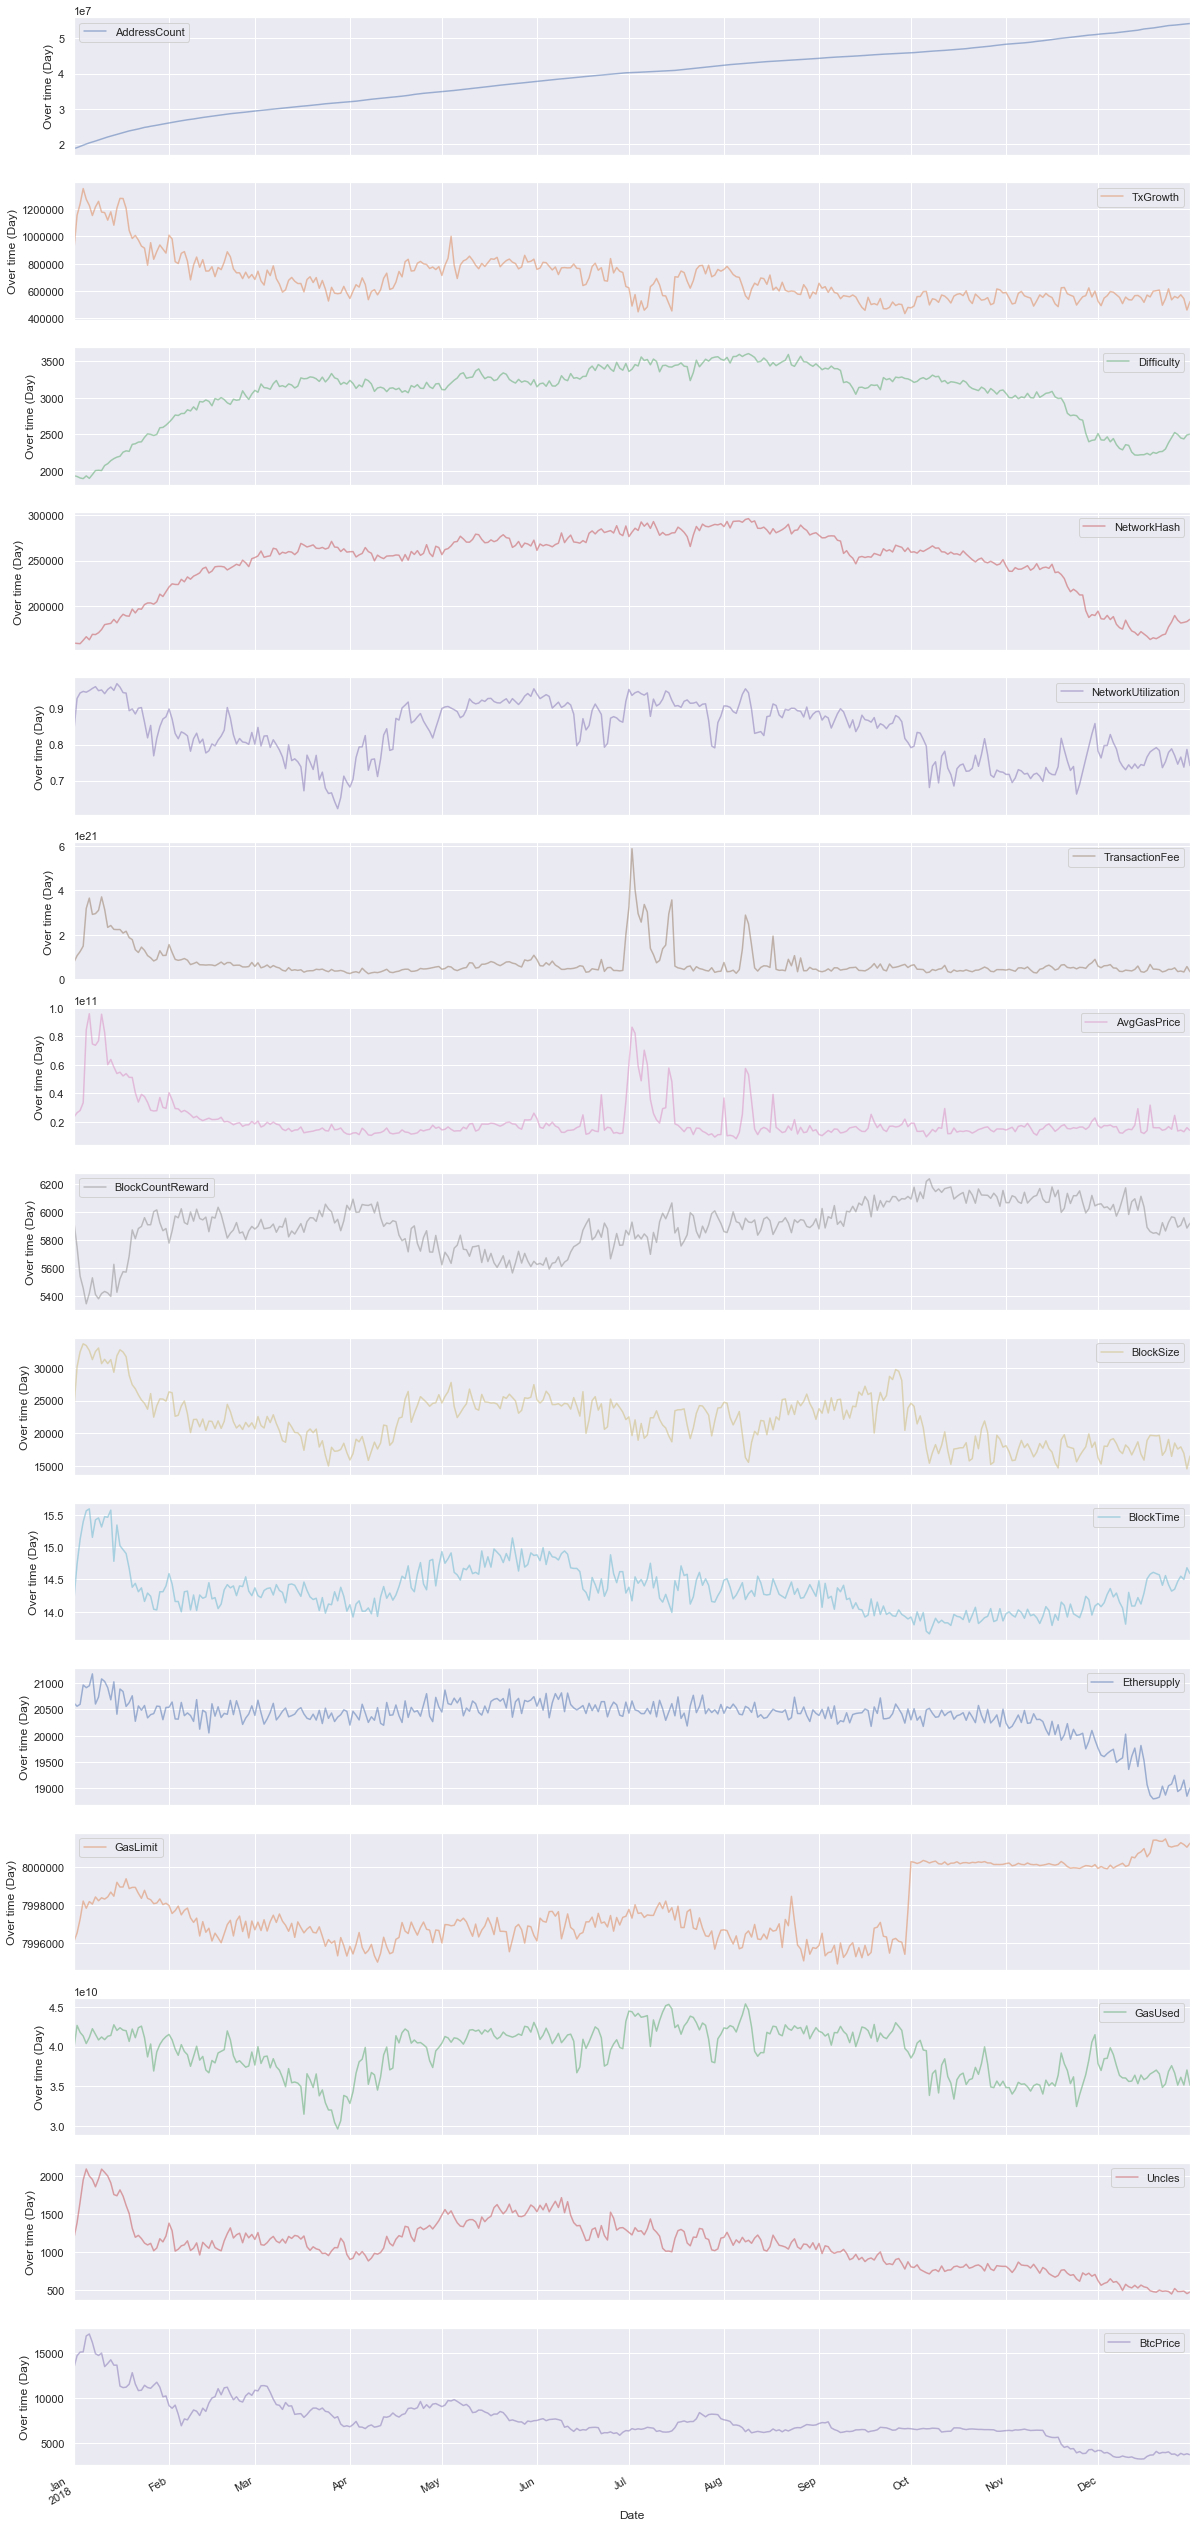

In [17]:
# columns
axes = df_time["2018"][columns[1:]].plot(alpha=0.5,  figsize=(20, 50), subplots=True)
for ax in axes:
    ax.set_ylabel('Over time (Day)')

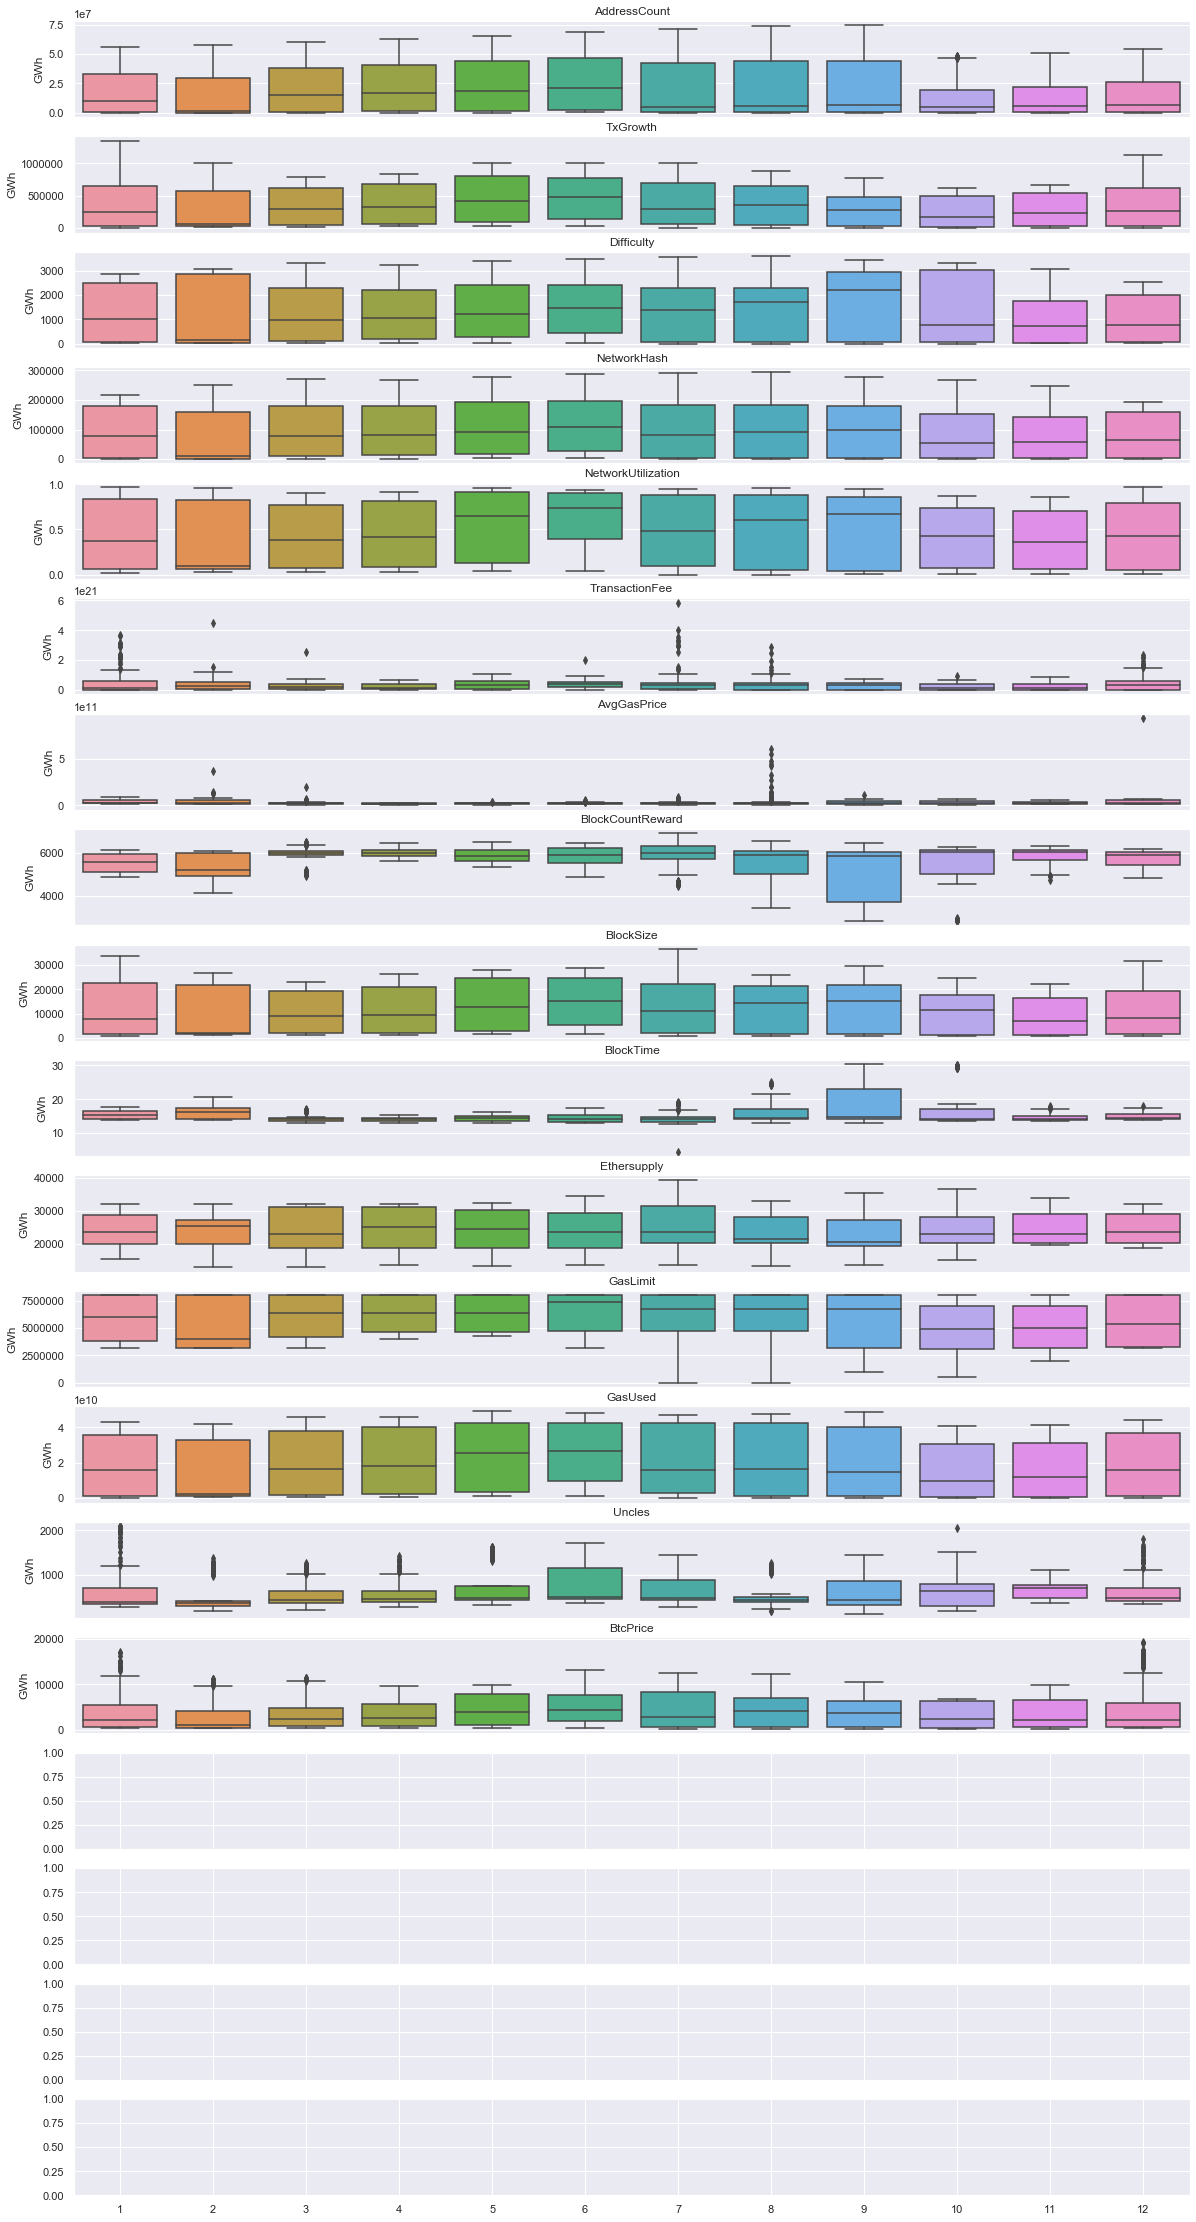

In [18]:
fig, axes = plt.subplots(19, 1, figsize=(20, 40), sharex=True)
for name, ax in zip(columns[1:], axes):
    sns.boxplot(data=df_time, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Seasonality Plot

Text(0.5, 1.0, 'BtcPrice')

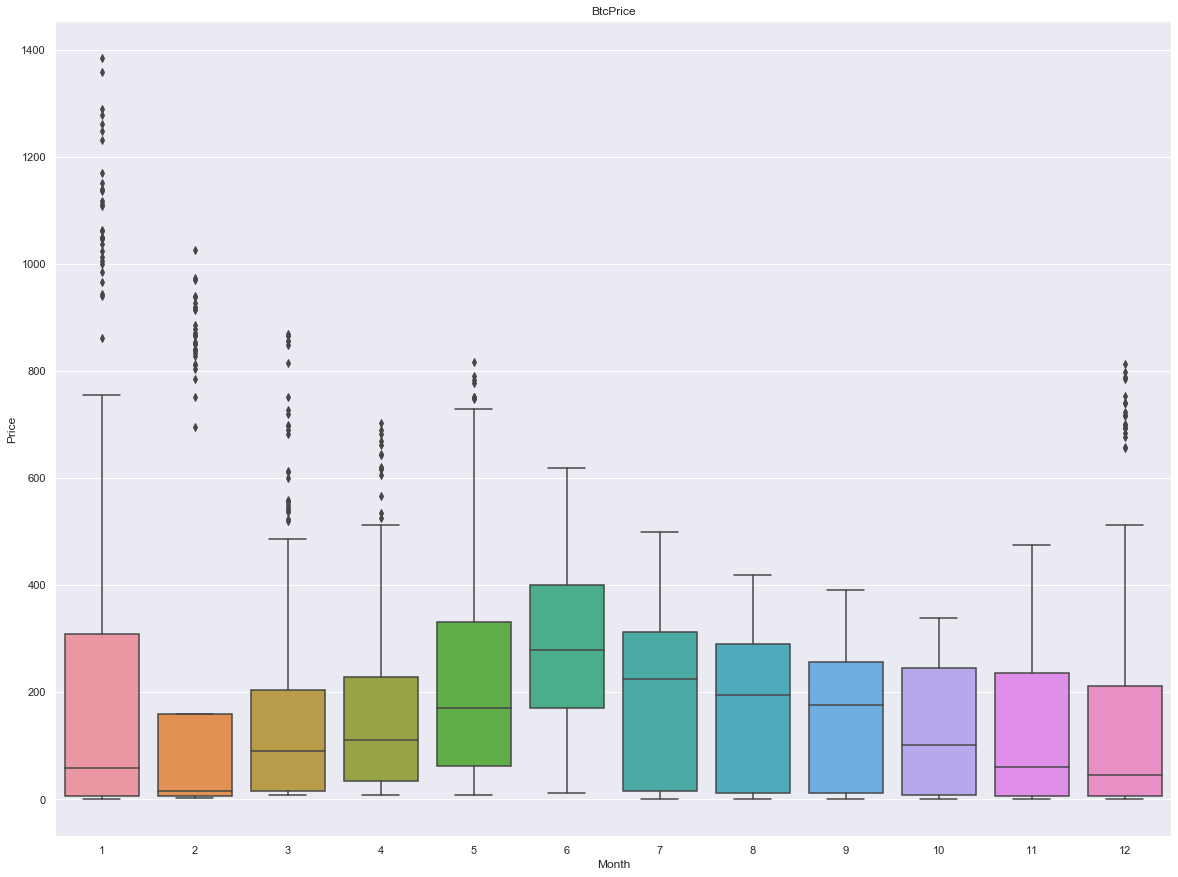

In [19]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

Text(0.5, 1.0, 'BtcPrice')

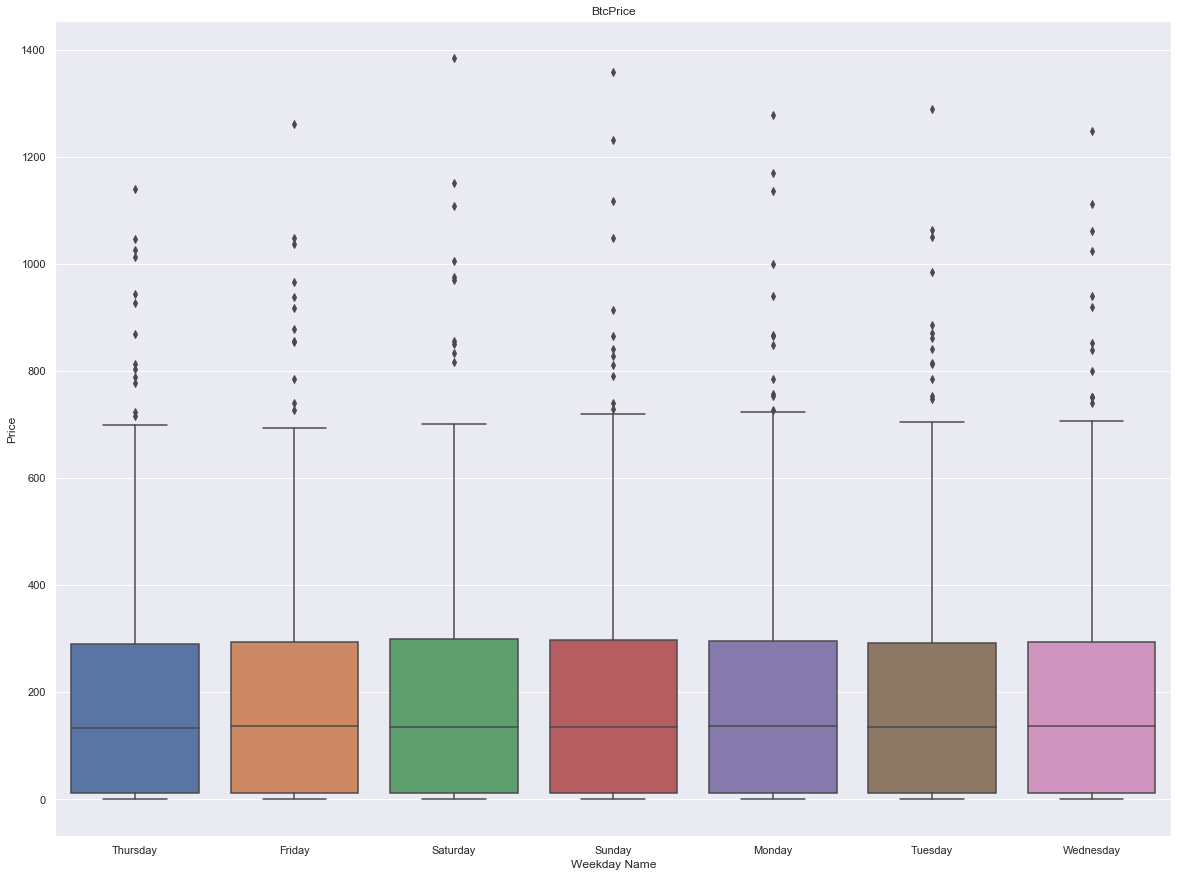

In [20]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

Text(0.5, 1.0, 'BtcPrice')

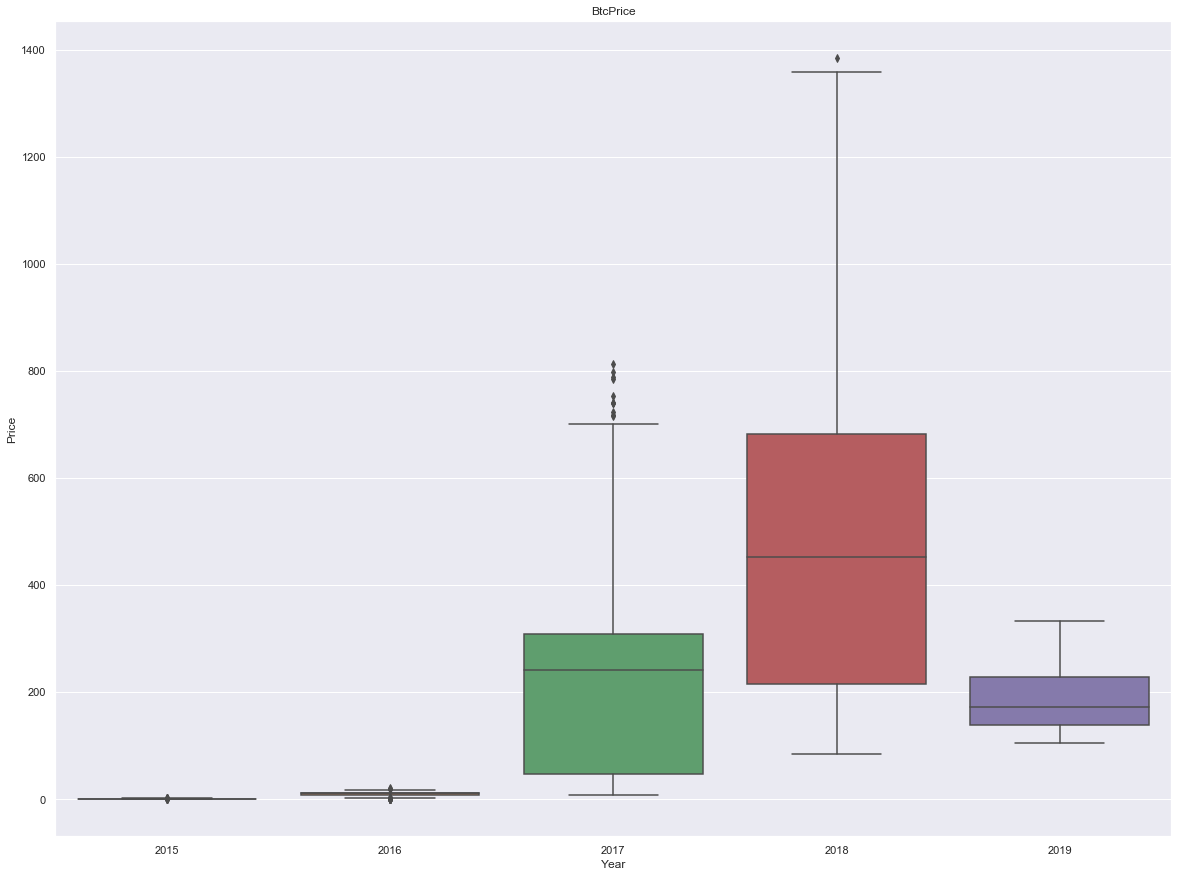

In [21]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Year', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [22]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object


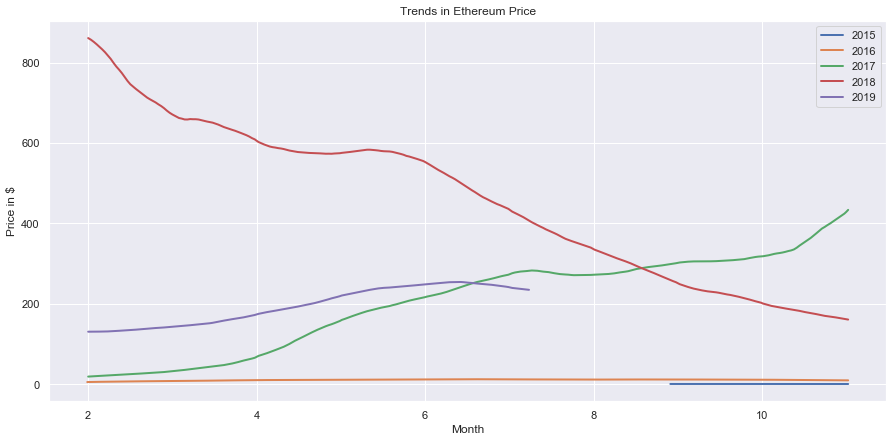

In [23]:

years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(90, center=True).mean()
    
fig, ax = plt.subplots()
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

### Trend Plot

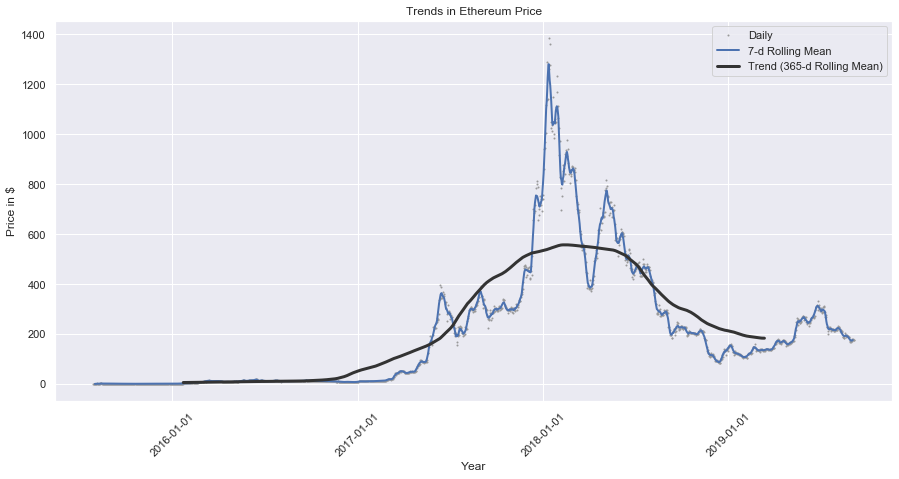

In [24]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price','BtcPrice']
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
df_time_365d = df_time[data_columns].rolling(window=365, center=True, min_periods=360).mean()
df_time_7d = df_time[data_columns].rolling(7, center=True).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df_time[column], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_time_365d[column], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [25]:
ax.get_xticklabels()

<a list of 5 Text xticklabel objects>

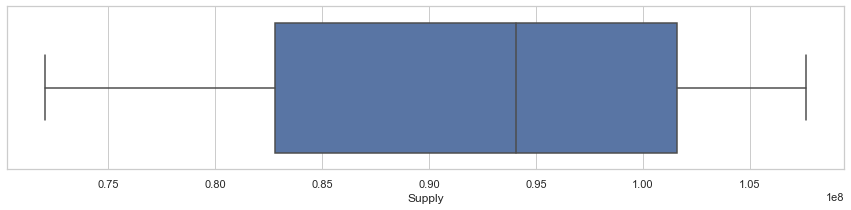

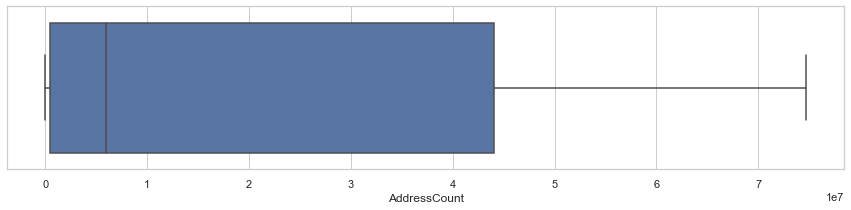

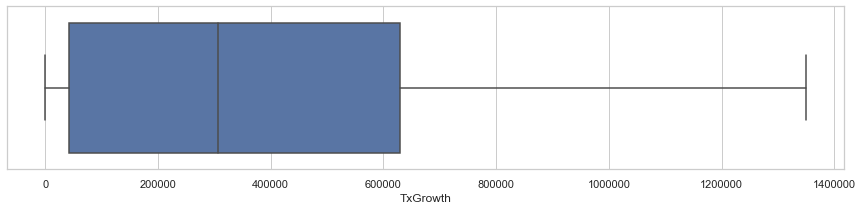

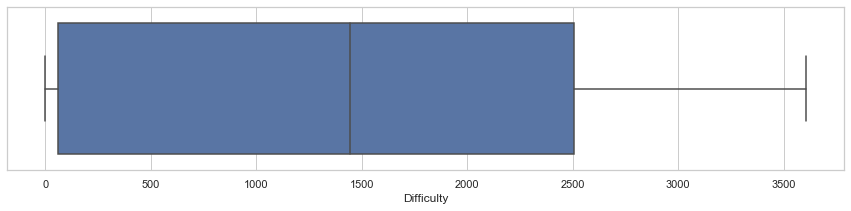

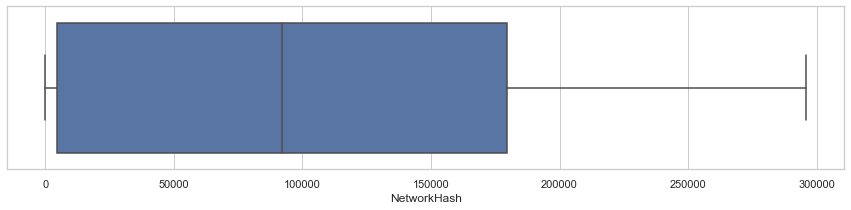

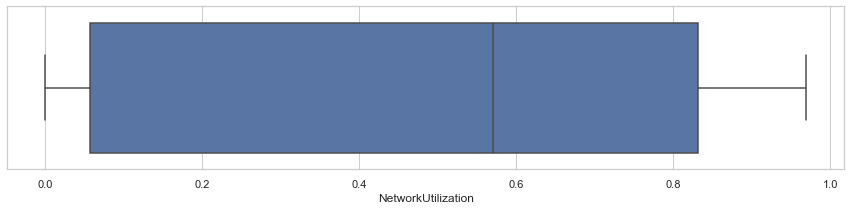

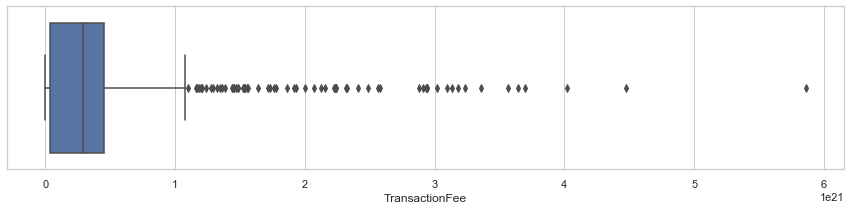

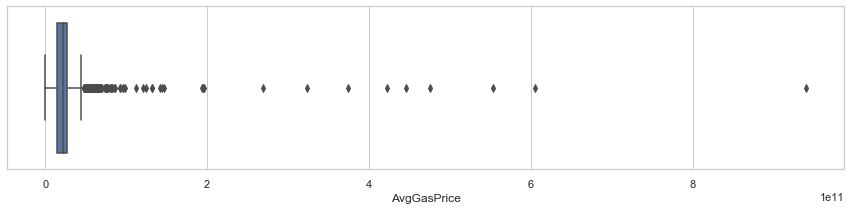

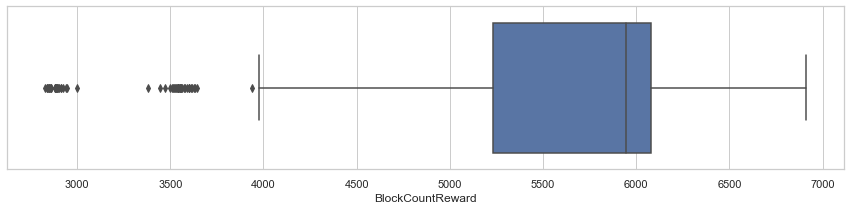

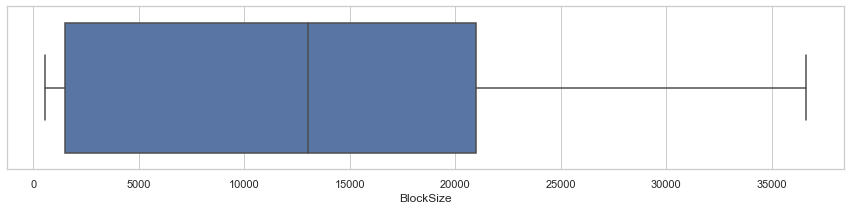

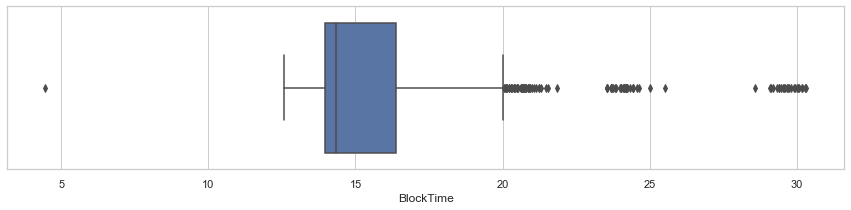

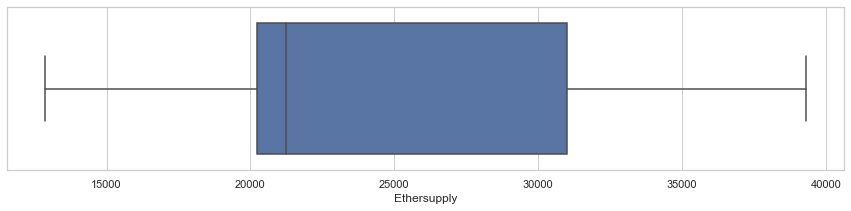

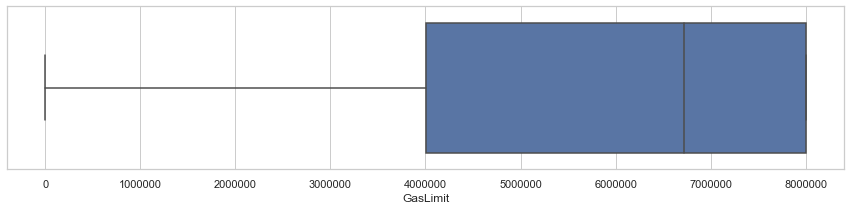

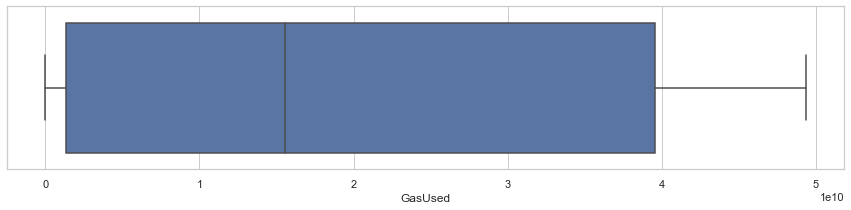

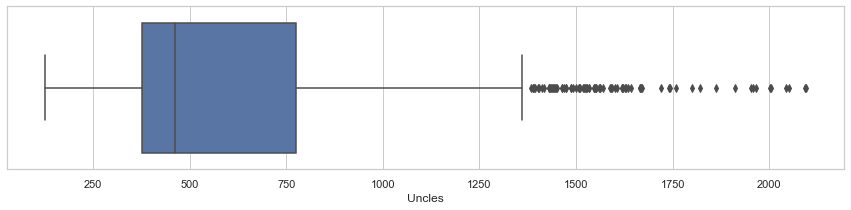

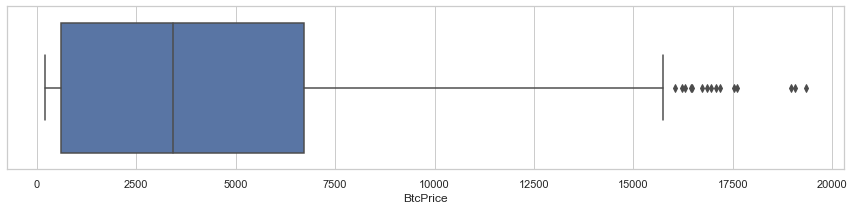

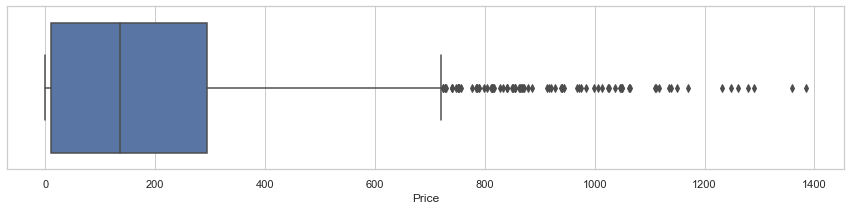

In [26]:
# Visualizations - BoxPlot
columns = df_data.columns
sns.set(style="whitegrid")

for element in columns[1:]:   
    plt.figure(figsize = (15,3))
    ax = sns.boxplot(x=df_data[element])

## 3) Feature Engineering
### Handling outliers


### Normalization

### Feature Selection

### Feature Importance plots

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

### Data Split train and test

### Fit the model and predict

## 5) Evaluation
### Some evaluation methods

### Evaluation plots and data comparison

### Conclusion